# Benchmark Comparison

## Distance and Distance in Log 10

In [ ]:
import re
import csv
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d


def show(benchmark_name):
    fig = plt.figure(figsize=(12, 8), dpi=100)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    fig.suptitle(benchmark_name.capitalize(), fontsize=18, y=0.95)
    ax1.set_title('Distance')
    ax2.set_title('Distance in Log 10')
    ax3.set_title('Filtered Distance')
    ax4.set_title('Filtered Distance in Log 10')
    fig.text(0.5, 0.06, 'iteration', ha='center', fontsize=12)
    
    data = {}
    paths = glob(f'../data/{benchmark_name}_*/result.csv')
    paths.sort()
    for path in paths:
        optimizer_name = re.search(r'../data/.+_(.+)/result\.csv', path).group(1)
        with open(path) as f:
            rows = np.array([row for row in csv.reader(f)])
        row = rows[1:, 1:]
        row = row.reshape(len(row))
        row = row.astype(np.float)
        data[optimizer_name] = row

    for optimizer_name, y in data.items():
        x = np.arange(0, len(y) * 100, 100)
        log10_y = np.log10(y)
        filtered_y = gaussian_filter1d(y, sigma=5)
        filtered_log10_y = gaussian_filter1d(log10_y, sigma=5)
        
        ax1.plot(x, y, label=optimizer_name)
        ax2.plot(x, log10_y, label=optimizer_name)
        ax3.plot(x, filtered_y, label=optimizer_name)
        ax4.plot(x, filtered_log10_y, label=optimizer_name)
    
    if benchmark_name == 'ackley':
        ax1.set_ylim(0, 11)
        ax3.set_ylim(0, 11)
    elif benchmark_name == 'rastrigin':
        ax1.set_ylim(0, 6.1)

    plt.subplots_adjust(wspace=0.15)
    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()


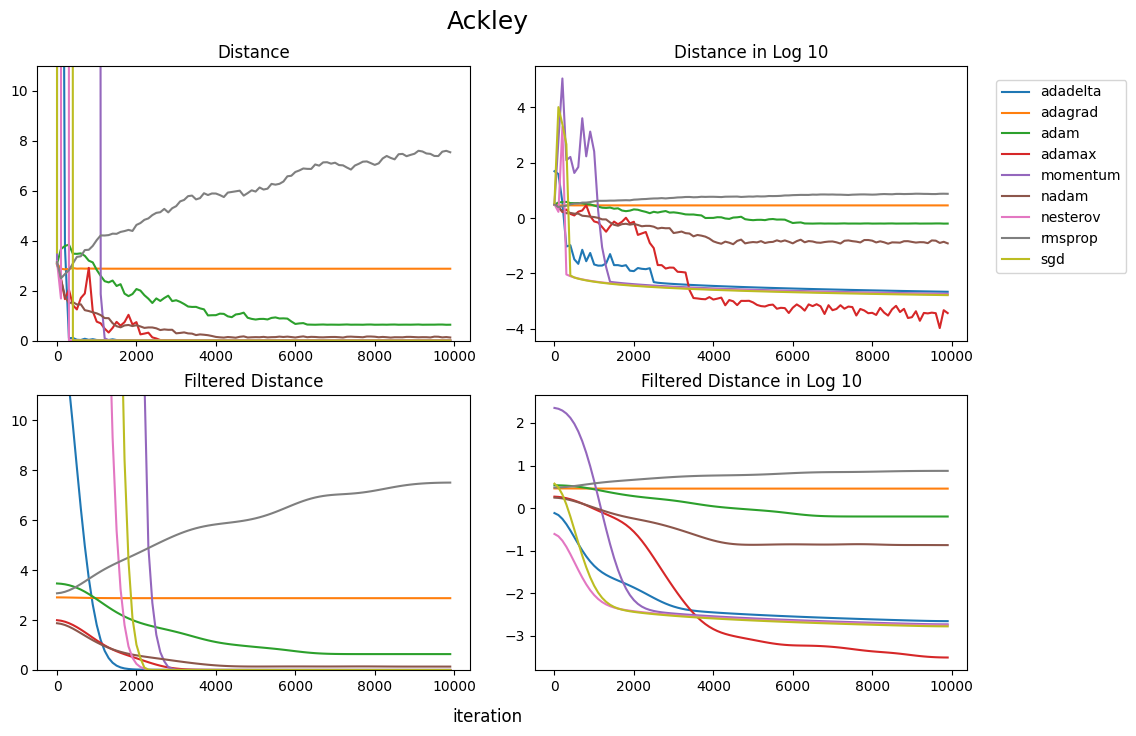

In [187]:
show('ackley')

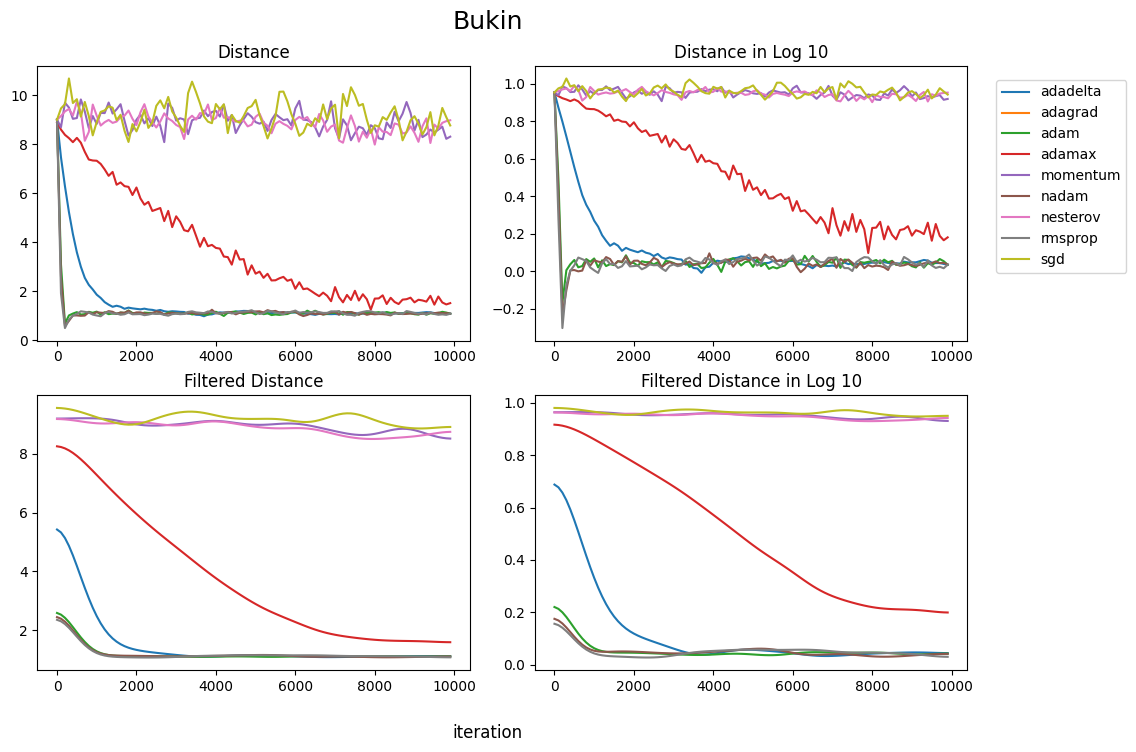

In [162]:
show('bukin')

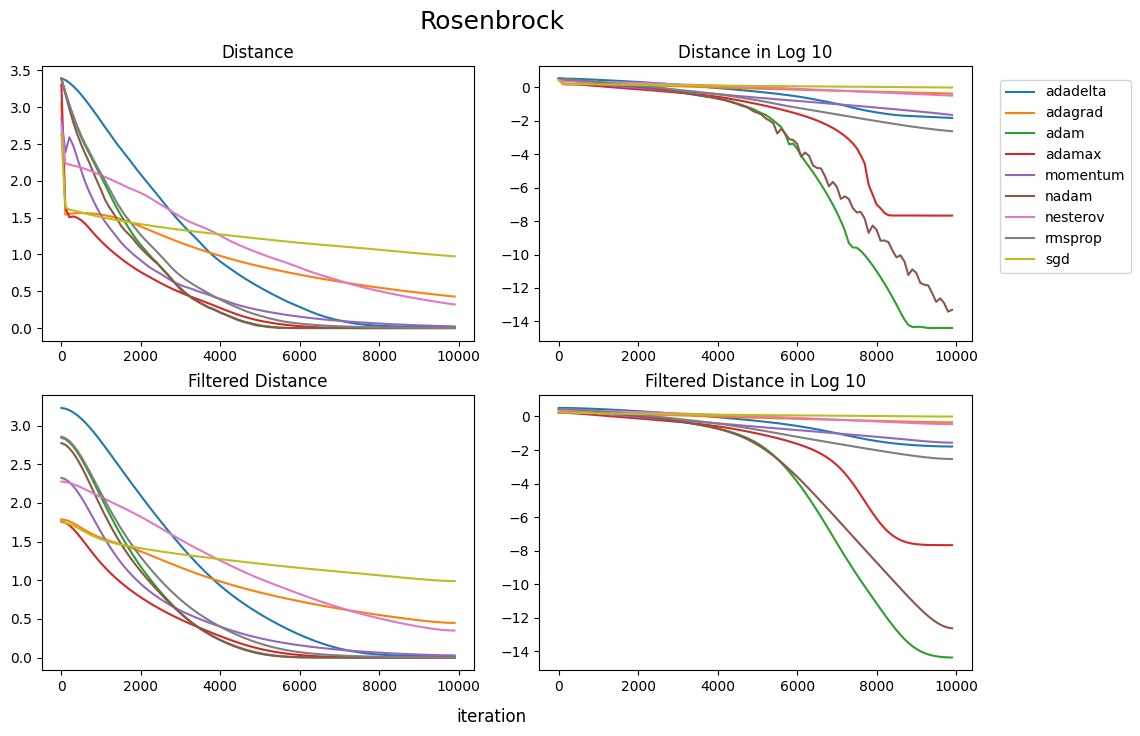

In [173]:
show('rosenbrock')

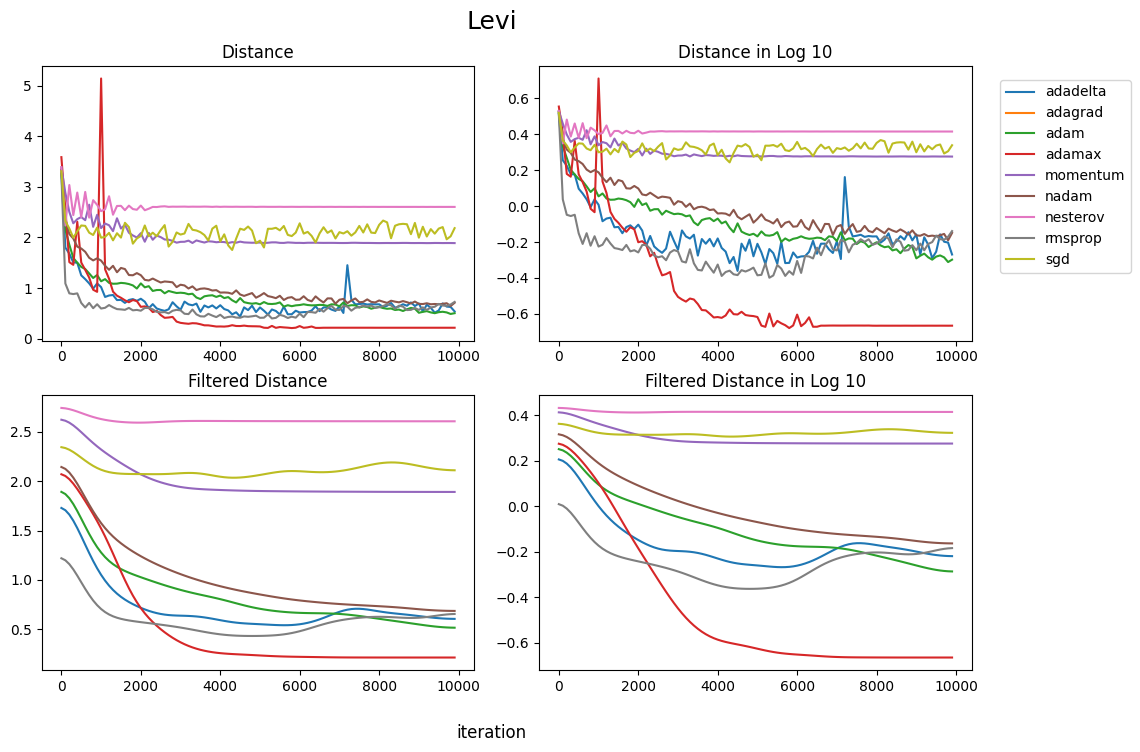

In [164]:
show('levi')

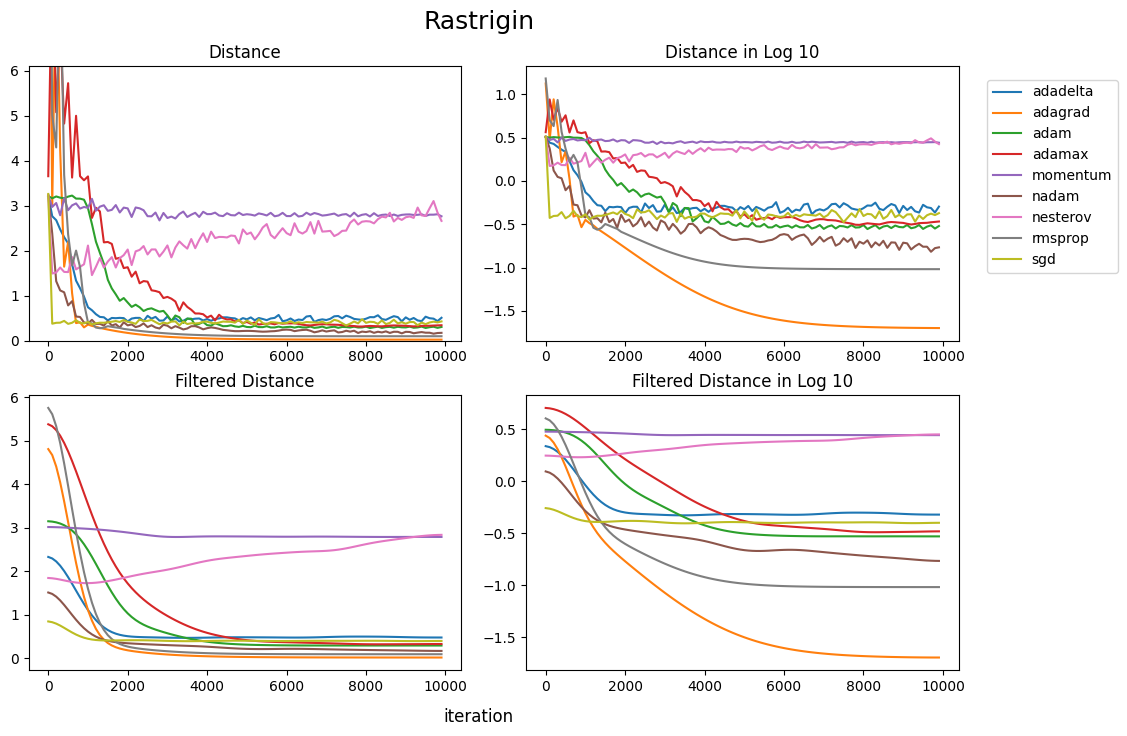

In [186]:
show('rastrigin')